<br><h4 style = "font-size:50px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">Infant Mortality Data Analysis</h4>
<center><img src="https://i.pinimg.com/564x/60/a0/e1/60a0e1ccb30612840108de741b3d8961.jpg" alt = 'Smiling Infant' border = 5px double></center>

<h2>Background</h2>
Infant Mortality is when the baby dies within a year after birth. The WHO estimates that roughly 4.0 million infants die within their first year. Let's take a look at the data, and see what we can find. I have a background in medicinal sciences, and I have a heart for little kids who can't yet protect themselves. I feel that it is our responsibilty to protect them.

<br><br>
In this notebook, I will look at a dataset which I found on Kaggle and visualize it for us. I will point out any insights that I find, and try to answer some key questions. This is a starting point to be linked with future analyses in the future. I hope to tell as simple story that is easy for everyone to understand. This is a followup to completing the data visualization mini-course on Kaggle.
<br><br>

<h2>About the data:</h2>
The data contains a list of all countries and regions, as well as that year's reported infant mortality rate (deaths per 1,000 births).

<br>
<h2>Questions attempted to answer:</h2>
<li>Which countries have the highest risk?</li>
<li>Which countries have the lowest risk?</li>
<li>Are there any countries whose rates are increasing?</li>
<li>(Bonus!) Interesting findings and interesting cases</li>

<h2>Questions to answer in followup analysis:</h2>
I looked into a bit of the causes, but if I can find the data, I would like to look more into causes and preventive measures, and calculate the predicted reduction in infant mortality through measures like that.

<h2>Final Conclusions</h2>
Judging by the data that was analyzed, my personal opinion about which countries the world can focus on to help.

<h2>About Me</h2>
I have just graduated from the IBM Data Science Professional Program. Before that, I had no knowledge about computers at all. Compared to many of you, I am still relatively new. I am learning every day, so if you have any feedback on how to make my presentation better, or about my code, please tell me. I'm very receptive to the feedback. Thank you. By the way, this is my first notebook.


In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
print("Setup Complete")

/kaggle/input/infant-mortality/InfantMortalityRate.csv
Setup Complete


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
filepath = '../input/infant-mortality/InfantMortalityRate.csv'
my_data = pd.read_csv(filepath, encoding_errors = 'ignore')

In [4]:
my_data.head()

,Country,Infant Mortality Rate,Gender,Year
0,Afghanistan,43.050731,Female,2019.0
1,Angola,44.851045,Female,2019.0
2,Albania,7.659442,Female,2019.0
3,Andorra,2.555451,Female,2019.0
4,United Arab Emirates,5.716825,Female,2019.0


<h4><img src="https://img.freepik.com/free-vector/cute-funny-emoji-smile-face-meditate-yoga-pose-vector-flat-line-doodle-cartoon-kawaii-character-illustration-icon-isolated-white-background-yellow-emoji-circle-character-concept_92289-3169.jpg?w=826" alt="meditation guy" width="50" height="50">Let's get to know our data</h4>

In [5]:
my_data.Gender.describe()

count       7623
unique         3
top       Female
freq        2541
Name: Gender, dtype: object

In [6]:
my_data['Gender'].unique()

array(['Female', 'Male', 'Total', nan], dtype=object)

<h4><img src="https://img.freepik.com/free-vector/cute-funny-emoji-smile-face-with-idea-lamp-vector-flat-line-doodle-cartoon-kawaii-character-illustration-icon-isolated-white-background-yellow-emoji-circle-character-concept_92289-3171.jpg?w=826" alt="happy guy" width="50" height="50">"Total" is a bit confusing. This actually refers to the average, so let's rename it to "Average"</h4>

In [7]:
my_data.replace('Total', 'Average', inplace=True)

In [8]:
my_data.describe()

,Infant Mortality Rate,Year
count,7623.000000,7623.000000
mean,24.457933,2014.000000
std,21.573666,3.162485
min,1.361716,2009.000000
25%,6.808024,2011.000000
50%,17.051576,2014.000000
75%,36.946646,2017.000000
max,116.931140,2019.000000


In [9]:
print('Total numbers of countries and territories:', len(my_data['Country'].unique()))
print(my_data['Country'].unique())


Total numbers of countries and territories: 230
['Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Armenia' 'Antigua and Barbuda' 'Australia' 'Austria'
 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bulgaria' 'Bahrain' 'Bahamas' 'Bosnia and Herzegovina' 'Belarus'
 'Belize' 'Bolivia (Plurinational State of)' 'Brazil' 'Barbados'
 'Brunei Darussalam' 'Bhutan' 'Botswana' 'Central African Republic'
 'Canada' 'Switzerland' 'Chile' 'China' "Cte d'Ivoire" 'Cameroon'
 'Democratic Republic of the Congo' 'Congo' 'Cook Islands' 'Colombia'
 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba' 'Cyprus' 'Czechia' 'Germany'
 'Djibouti' 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador'
 'Egypt' 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France'
 'Micronesia (Federated States of)' 'Gabon' 'United Kingdom' 'Georgia'
 'Ghana' 'Guinea' 'Gambia' 'Guinea-Bissau' 'Equatorial Guinea' 'Greece'
 'Grenada' 'Guatemala' 'Guyana' 'Honduras' 'Croa

In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                7623 non-null   object 
 1   Infant Mortality Rate  7623 non-null   float64
 2   Gender                 7623 non-null   object 
 3   Year                   7623 non-null   float64
dtypes: float64(2), object(2)
memory usage: 238.4+ KB


<h4 VALIGN=TOP><img src="https://img.freepik.com/free-vector/cute-funny-think-emoji-smile-face-with-question-mark-vector-flat-line-doodle-cartoon-kawaii-character-illustration-icon-isolated-white-background-yellow-emoji-circle-think-character-concept_92289-3170.jpg?w=826" alt="question guy" width="50" height="50">How many null values do we have?</h4>

In [11]:
my_data.isna().sum()

Country                  2
Infant Mortality Rate    2
Gender                   2
Year                     2
dtype: int64

<h4 VALIGN=TOP><img src="https://img.freepik.com/free-vector/cute-funny-think-emoji-smile-face-with-question-mark-vector-flat-line-doodle-cartoon-kawaii-character-illustration-icon-isolated-white-background-yellow-emoji-circle-think-character-concept_92289-3170.jpg?w=826" alt="question guy" width="50" height="50">Where are they?</h4>

In [12]:
np.where(np.asanyarray(np.isnan(my_data['Year'])))

(array([7623, 7624]),)

<h4><img src="https://img.freepik.com/free-vector/cute-funny-emoji-smile-face-with-idea-lamp-vector-flat-line-doodle-cartoon-kawaii-character-illustration-icon-isolated-white-background-yellow-emoji-circle-character-concept_92289-3171.jpg?w=826" alt="question guy" width="50" height="50">Only 2! Let's clean them up</h4>

In [13]:
my_data.drop(my_data.index[[7623,7624]], inplace=True)

<h4><img src="https://img.freepik.com/free-vector/cute-funny-emoji-smile-face-meditate-yoga-pose-vector-flat-line-doodle-cartoon-kawaii-character-illustration-icon-isolated-white-background-yellow-emoji-circle-character-concept_92289-3169.jpg?w=826" alt="meditation guy" width="50" height="50">Well... let's get to our graphs and see if we can pick up some interesting trends</h4>

<br><h4 style = "font-size:50px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">Initial Image Analysis</h4>

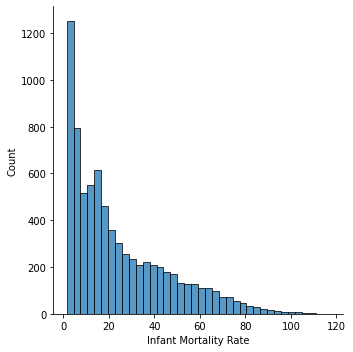

In [14]:
sns.displot(x=my_data['Infant Mortality Rate'])

We can see that the data is skewed heavily to the right. I guess this is a very happy thing for us, as it means that more countries have lower infant mortality throughout the years.

<AxesSubplot:title={'center':'Infant Mortality Rates'}, xlabel='Year', ylabel='Infant Mortality Rate'>

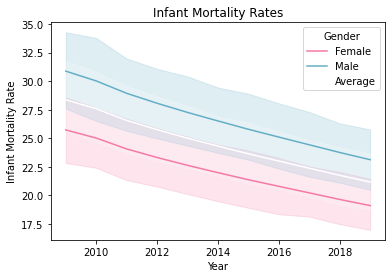

In [15]:
palettez ={"Female": "#f678a7", "Male": "#62aec5", "Average": "white"}
plt.title('Infant Mortality Rates')
sns.lineplot(data=my_data, x= my_data['Year'], y = my_data['Infant Mortality Rate'], hue = my_data['Gender'], palette=palettez)

We can see that on the whole, the trend is going down. This is more happy news.

We can also see that on average, baby boys have a higher mortality rate than baby girls. Upon a bit of research, this seems to be pretty well documented in medical literature. <br> For example:
<a href="https://pubmed.ncbi.nlm.nih.gov/23151996/#:~:text=Infant%20mortality%20is%20higher%20in,to%20diseases%20and%20premature%20death">Medical Research</a>

Because it is a bit beyond the scope of this report, let's simplify things a bit and use the "Average" metric. This takes the average of the boys and the girls. This will be the new primary dataframe from which we will work.

In [16]:
avg_data = my_data[my_data['Gender'] == 'Average']

Let's clean up that little decimal point... it will make the graphs a bit messy later.

In [17]:
avg_data['Year'] = avg_data['Year'].astype(int)

In [18]:
avg_data.head()

,Country,Infant Mortality Rate,Gender,Year
5082,Afghanistan,46.512825,Average,2019
5083,Angola,50.180155,Average,2019
5084,Albania,8.614279,Average,2019
5085,Andorra,2.831607,Average,2019
5086,United Arab Emirates,6.404889,Average,2019


<AxesSubplot:title={'center':'Infant Mortality Rates'}, xlabel='Year', ylabel='Infant Mortality Rate'>

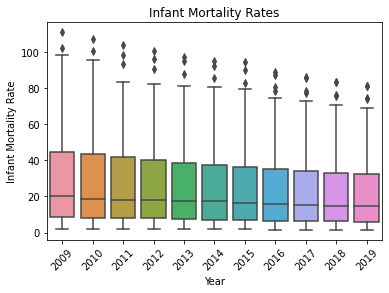

In [19]:
plt.xticks(rotation=45)
plt.title('Infant Mortality Rates')
sns.boxplot(x= avg_data['Year'], y= avg_data['Infant Mortality Rate'])

We can see an overall downward trend. This is good! However, we can see that there are quite a few very high outliers. This is concerning. We can see that the median value for the boxplot is so much lower than these values. Let's investigate a bit more about these.

Each country is different... Let's take the time to look at the overall trends for each country, and see what we can find.

<br><h4 style = "font-size:50px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">FacetGrid!</h4>

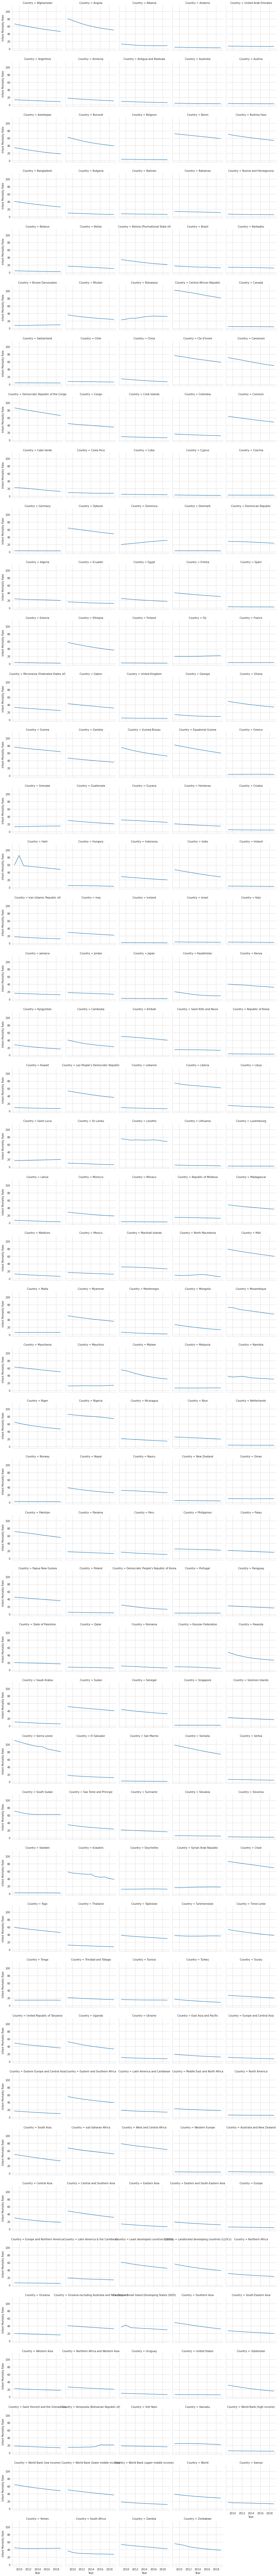

In [20]:
sns.set_style("whitegrid")
grid = sns.FacetGrid(avg_data, col="Country", col_wrap=5)
grid.map(sns.lineplot,'Year','Infant Mortality Rate')


<br><h4 style = "font-size:50px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">Initial Insights from EDA</h4>

* Overall, there is a downward trend throughout the world
* There are several countries which have considerably higher infant mortality rates compared with the world average
* Surprisingly, the infant mortality rate of some countries are rising
* There were 3 countries with mysterious spikes (Brazil, Haiti, and North Macedonia)

Let us take a look at this issues in 3 different sections of the report:
1. Identification of the countries with the highest number of infant mortality, specifically, our outliers
2. Identification of countries which have rising infant mortality rates
3. A brief investigation of the mysterious spikes

<h4 style = "font-size:50px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">1. Identifying Countries with the Overall Highest Infant Mortality</h4>

For now, we want to look at the actual numbers rather than the trends, so let's simplify by looking at the most recent year in the dataset.

In [21]:
countries_2019 = avg_data[avg_data['Year'] == 2019]

In [22]:
countries_2019['Infant Mortality Rate'].describe()

count    231.000000
mean      21.160393
std       18.672680
min        1.493181
25%        5.846095
50%       14.486694
75%       32.241502
max       81.003217
Name: Infant Mortality Rate, dtype: float64

<AxesSubplot:title={'center':'Swarm Plot'}, xlabel='Year', ylabel='Infant Mortality Rate'>

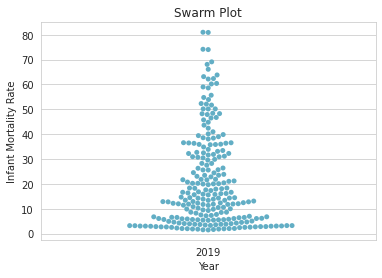

In [23]:
plt.title('Swarm Plot')
sns.swarmplot(data = countries_2019, x = countries_2019['Year'], y = countries_2019['Infant Mortality Rate'], color = '#62aec5')

One way that we can divide these groups is to use the Z-score... but we will see later that it is kind of arbitrary, as there is no clear division line between the countries...
However, if a fellow statistician were to want to manipulate the data, then a good measure would be the Z-score.

In [24]:
high_risk_group = countries_2019[(np.abs(stats.zscore(countries_2019['Infant Mortality Rate'])) > 2)]

<AxesSubplot:title={'center':'Countries with Z-score > 2'}, xlabel='Infant Mortality Rate', ylabel='Country'>

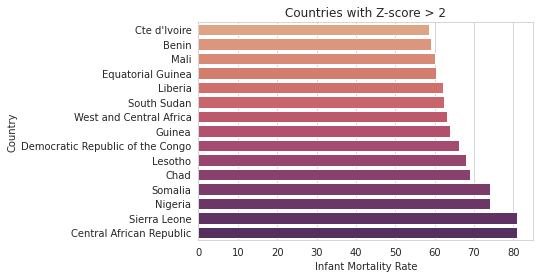

In [25]:
plt.title('Countries with Z-score > 2')
hrc_bar_sort1 = high_risk_group.sort_values('Infant Mortality Rate').Country
sns.barplot(data = high_risk_group, x = high_risk_group['Infant Mortality Rate'], 
            y = high_risk_group['Country'], order = hrc_bar_sort1, palette = 'flare')

We can also use the Z-score to find the countries with lowest risk.

In [26]:
low_risk_group = countries_2019[stats.zscore(countries_2019['Infant Mortality Rate']) < -1]

<AxesSubplot:title={'center':'Countries with Z-score < -1'}, xlabel='Infant Mortality Rate', ylabel='Country'>

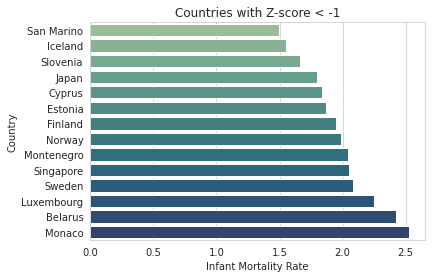

In [27]:
plt.title('Countries with Z-score < -1')
hrc_bar_sort2 = low_risk_group.sort_values('Infant Mortality Rate').Country
sns.barplot(data = low_risk_group, x = low_risk_group['Infant Mortality Rate'], 
            y = low_risk_group['Country'], order = hrc_bar_sort2, palette = 'crest')

It is important to include a note that the x-axis is different, and only goes up to 2.5. Each of these countries are doing absolutely fantastic.

<h4><img src="https://img.freepik.com/free-vector/cute-funny-emoji-smile-face-with-idea-lamp-vector-flat-line-doodle-cartoon-kawaii-character-illustration-icon-isolated-white-background-yellow-emoji-circle-character-concept_92289-3171.jpg?w=826" alt="question guy" width="50" height="50">Let's just take a look at all of our countries... can you find yours?</h4>

<AxesSubplot:xlabel='Infant Mortality Rate', ylabel='Country'>

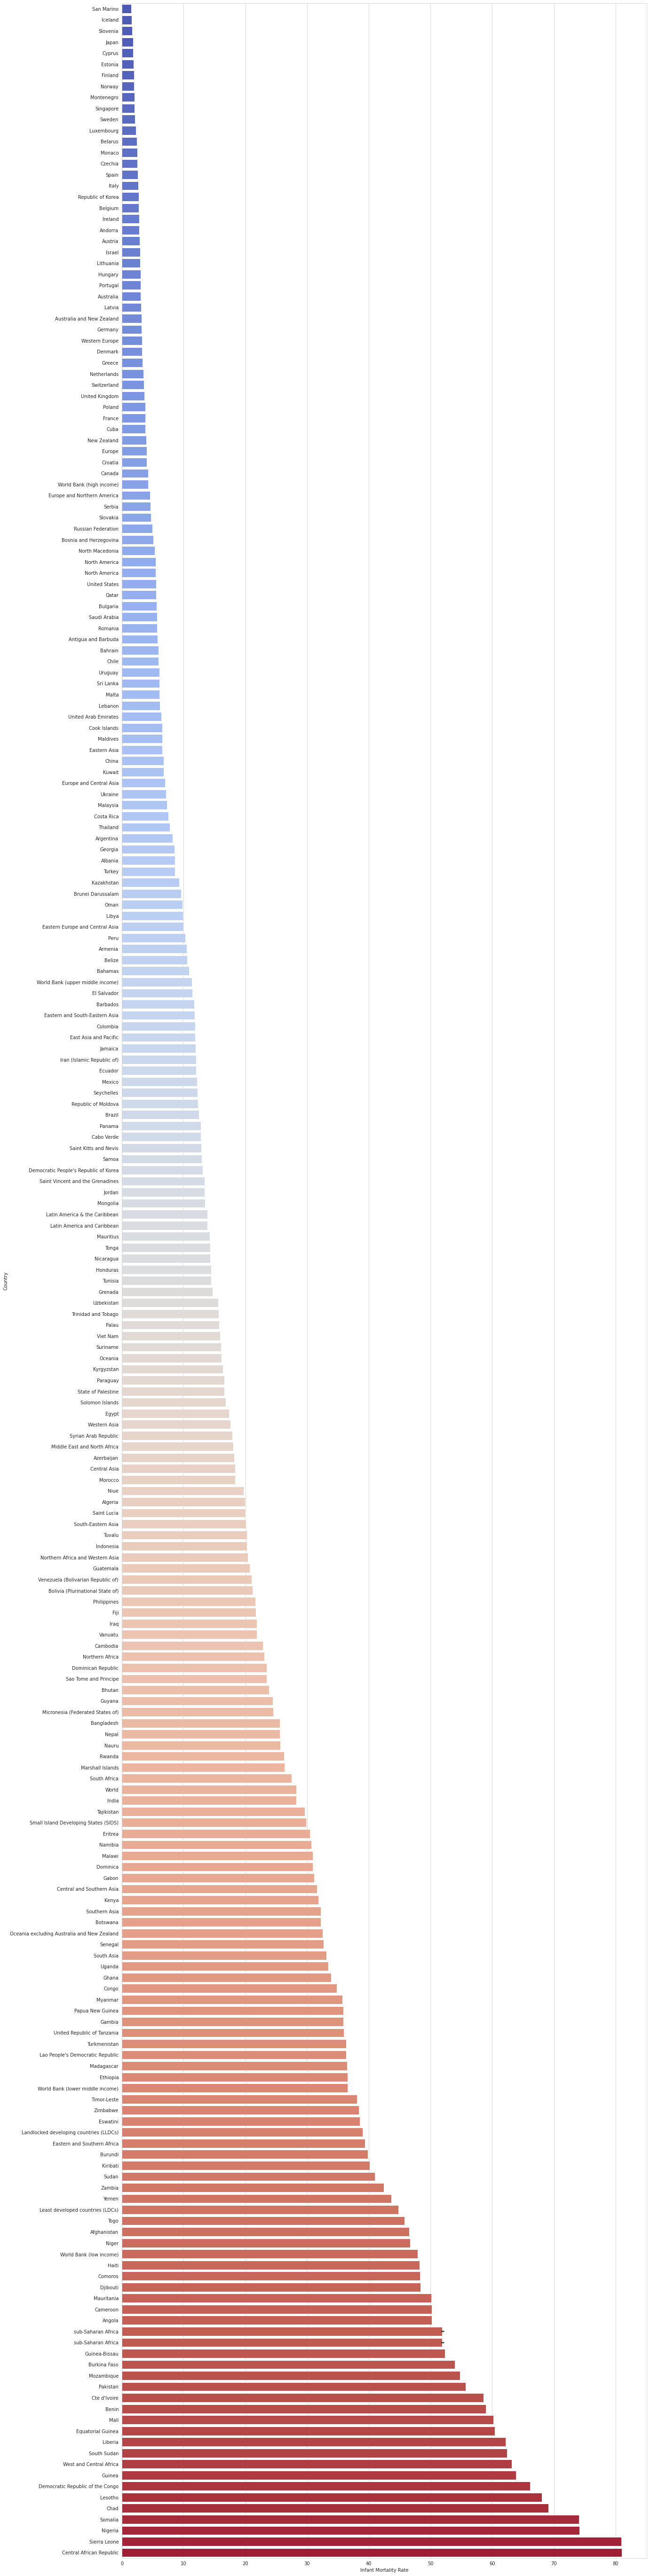

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,100))
bar_sort = countries_2019.sort_values('Infant Mortality Rate').Country
sns.barplot(data = countries_2019, x = countries_2019['Infant Mortality Rate'], 
            y = countries_2019['Country'], order = bar_sort, palette = "coolwarm")

Another tactic would to be just look at the graph and choose a number that you want to focus on.

In [29]:
high_risk_countries = countries_2019[countries_2019['Infant Mortality Rate'] > 52.1]

<AxesSubplot:title={'center':'Our highest risk countries'}, xlabel='Infant Mortality Rate', ylabel='Country'>

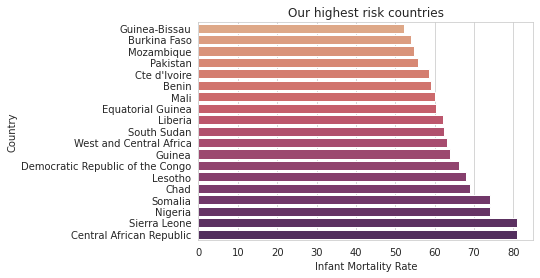

In [30]:
plt.title('Our highest risk countries')
hrc_bar_sort = high_risk_countries.sort_values('Infant Mortality Rate').Country
sns.barplot(data = high_risk_countries, x = high_risk_countries['Infant Mortality Rate'], 
            y = high_risk_countries['Country'], order = hrc_bar_sort, palette = 'flare')

Let's save these countries in a list to check on them with our facet grid

In [31]:
hrc_list = list(high_risk_countries.Country.values)

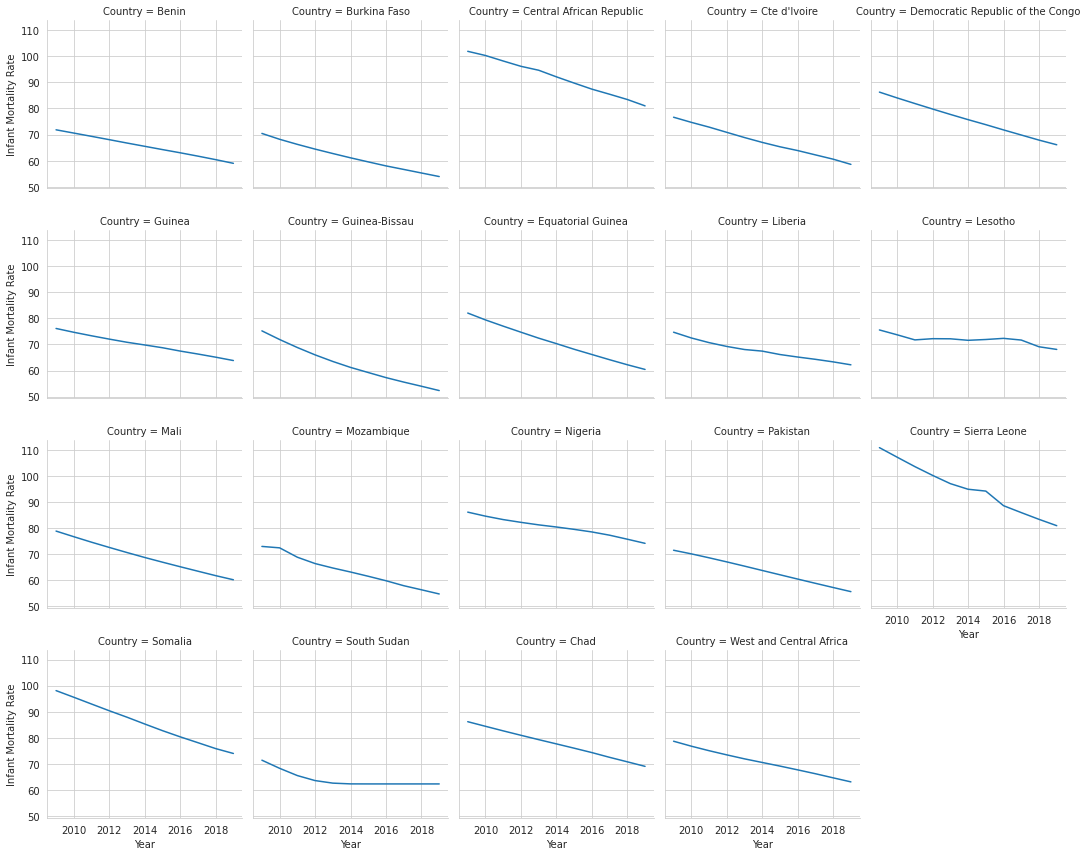

In [32]:
grid = sns.FacetGrid(avg_data[avg_data['Country'].isin(hrc_list)], col="Country", col_wrap=5)
grid.map(sns.lineplot,'Year','Infant Mortality Rate')

<h4 style = "font-size:20px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">Part 1 Conclusions</h4>

Well... we can see that infant mortality rates are at least declining in our higher risk countries... that's one thing we can be thankful for...
We can also see that some countries, such as Sierra Leone, Somalia, and Central African Republiic, are making great progress!

Unfortunately this is not the case for all countries in our report.

This leads us to part 2...

<h4 style = "font-size:50px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">2. Identifying Countries with Rising Infant Mortality Rates</h4>

It seems that the majority of our data moves in a linear fashion. For the sake of keeping things simple, let's compare 2009 and 2019.

In [33]:
df_2019 = avg_data[avg_data['Year']==2019]
df_2009 = avg_data[avg_data['Year']==2009]

Let's get the values of 2009, 2019, and the countries from our original dataframe.

** As I mentioned... I am still learning. If anyone has some good feedback on how better to do this code, please let me know. I'm sure there is a better way, but this worked well enough for this situation.

In [34]:
death_2019 = []
for death in df_2019['Infant Mortality Rate']:
    death_2019.append(death)

death_2009 = []
for death in df_2009['Infant Mortality Rate']:
    death_2009.append(death)
    
country_list = []
for country in df_2009['Country']:
    country_list.append(country)    

It's nice to confirm that we got the right ones sometimes...

In [35]:
print(len(death_2009))
print(len(death_2019))
print(len(country_list))

231
231
231


Let's make a new simple dataframe.

In [36]:
comparison_df = pd.DataFrame({'Country': country_list, '2009_IMR': death_2009, '2019_IMR' : death_2019})

Let's create a new metric that shows the percentage increase or decrease over the 10 years of our data.

In [37]:
comparison_df['Percent_Change'] = round((comparison_df['2019_IMR'] - comparison_df['2009_IMR']) / (comparison_df['2009_IMR']) *100, 2)

In [38]:
comparison_df.describe()

,2009_IMR,2019_IMR,Percent_Change
count,231.000000,231.000000,231.000000
mean,28.369246,21.160393,-24.902424
std,24.365958,18.672680,15.712061
min,2.144415,1.493181,-68.460000
25%,8.564789,5.846095,-33.640000
50%,20.048250,14.486694,-25.490000
75%,44.800758,32.241502,-19.805000
max,110.807610,81.003217,53.360000


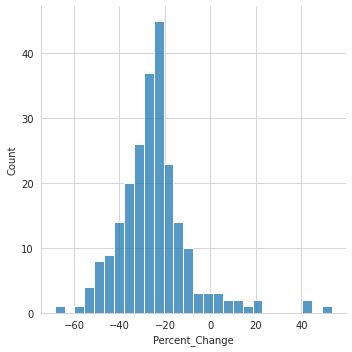

In [39]:
sns.displot(data = comparison_df, x = comparison_df['Percent_Change'])

We can see that on the whole, the data seems to be pretty normally distributed.
One country has even cut infant mortality in more than half!
But... wait... we can see that several countries are over the 0% mark... they are increasing... Let's take a closer look...
<br>Again, can you find your country?

<AxesSubplot:title={'center':'Percent Change by Country'}, xlabel='Percent_Change', ylabel='Country'>

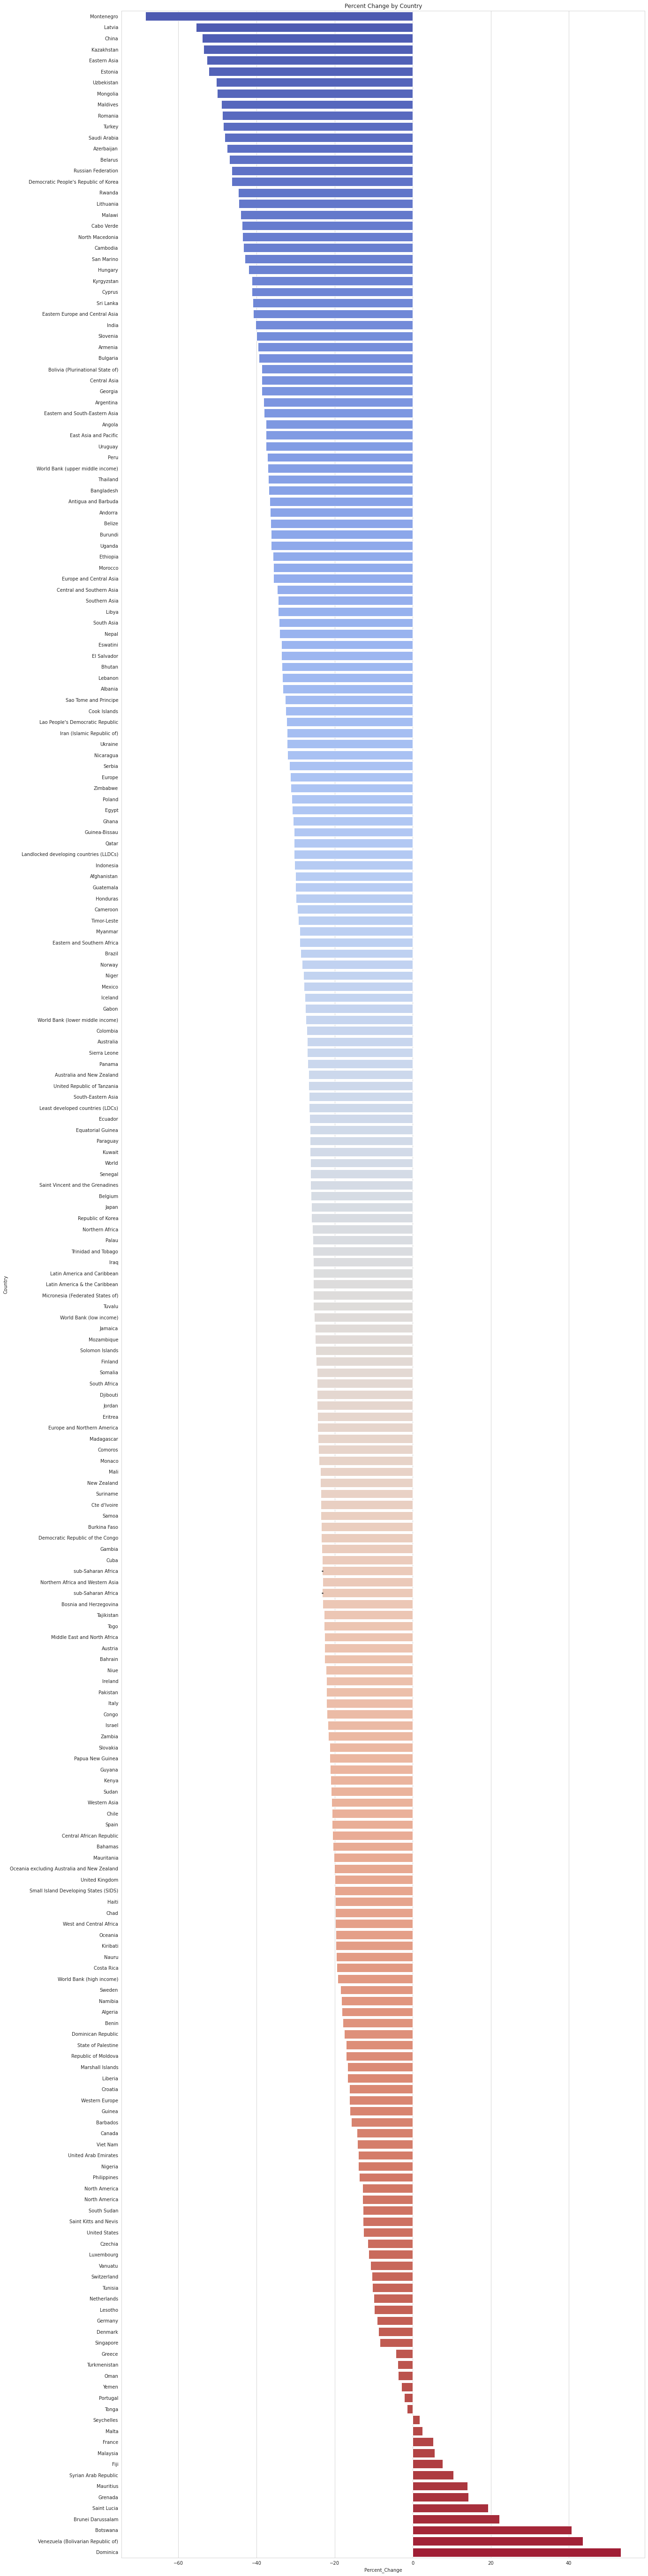

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,100))
plt.title('Percent Change by Country')
bar_sort3 = comparison_df.sort_values('Percent_Change').Country
sns.barplot(data = comparison_df, x = comparison_df['Percent_Change'], 
            y = comparison_df['Country'], order = bar_sort3, palette = "coolwarm")

Isolate the countries which have increasing infant mortality rates...

In [41]:
rising_country_df = comparison_df[comparison_df['2019_IMR'] > comparison_df['2009_IMR']]

<AxesSubplot:title={'center':'Countries with fastest rising infant mortality rates'}, xlabel='Percent_Change', ylabel='Country'>

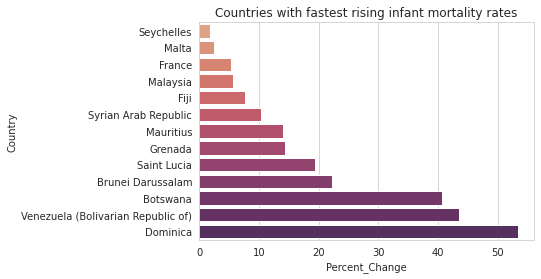

In [42]:
plt.title('Countries with fastest rising infant mortality rates')
hrc_bar_sort4 = rising_country_df.sort_values('Percent_Change').Country
sns.barplot(data = rising_country_df, x = rising_country_df['Percent_Change'], 
            y = rising_country_df['Country'], order = hrc_bar_sort4, palette = 'flare')

In [43]:
increasing_list = list(rising_country_df.Country.values)

Let's take a look at the graphs in more detail for each of these countires. There were many countries who had low values... and a slight rise in a very low value is not that bad.

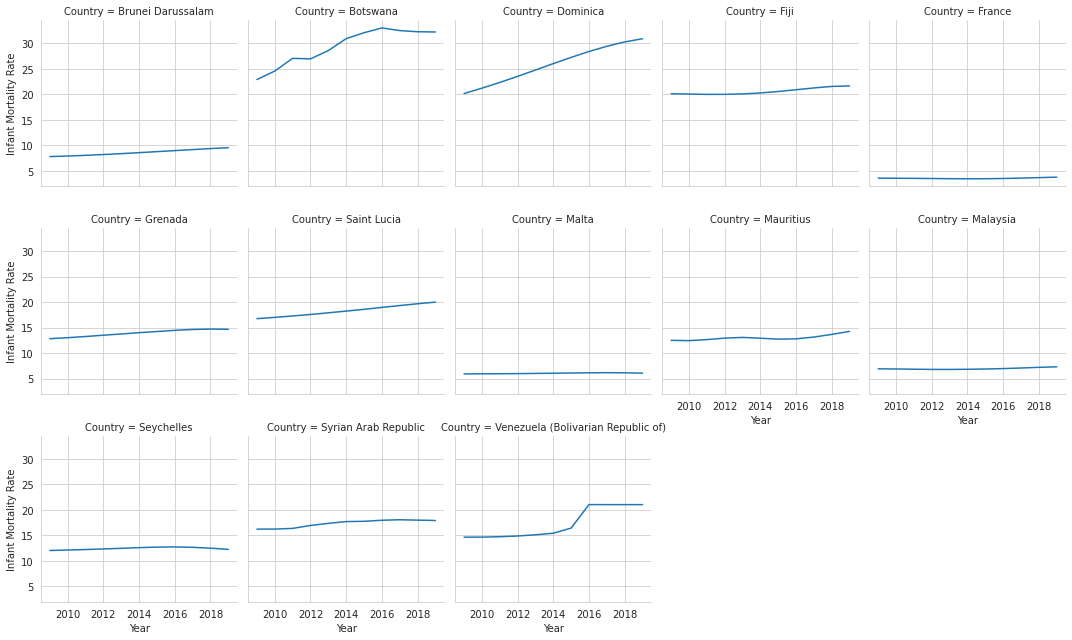

In [44]:
grid = sns.FacetGrid(avg_data[avg_data['Country'].isin(increasing_list)], col="Country", col_wrap=5)
grid.map(sns.lineplot,'Year','Infant Mortality Rate')

<h4 style = "font-size:20px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">Part 2 Conclusions</h4>
Just as we expected... there are several countries here who are just simply low!
We have 13 countries here, and I can see 3 basic patterns:
<li>Countries which have consistently low numbers: least concern
    <li style="margin-left:2em">France</li>
    <li style="margin-left:2em">Malta</li>
    <li style="margin-left:2em">Malaysia</li>
</li>
<li>Countries which are higher than we would like, but are not increasing so rapidly: medium concern
    <li style="margin-left:2em">Brunei Darussalam</li>
    <li style="margin-left:2em">Fiji</li>
    <li style="margin-left:2em">Grenada</li>
    <li style="margin-left:2em">Saint Lucia</li>
    <li style="margin-left:2em">Mauritius</li>
    <li style="margin-left:2em">Seychelles</li>
    <li style="margin-left:2em">Syrian Arab Republic</li>
</li>
<li>Countries which have both high numbers and a dangerous rate of increase: high concern
    <li style="margin-left:2em"> Botswana (Trouble with HIV):  
    <li style="margin-left:4em"><a href ="https://www.humanium.org/en/botswana/">Infant Mortality in Botswana</a></li></li>
    <li style="margin-left:2em"> Dominica (An ongoing natural struggle):  
    <li style="margin-left:4em"><a href ="https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(19)30344-4/fulltext">Infant Mortality in Dominica</a></li></li>
    <li style="margin-left:2em"> Venezuela (Perhaps due to the crisis there):  
    <li style="margin-left:4em"><a href ="https://en.wikipedia.org/wiki/Crisis_in_Venezuela">Crisis In Venezuela</a></li></li>

<h4 style = "font-size:50px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">Bonus! Interesting trends and cases</h4>

As we were searching through our facetgrid for insights... did you see anything interesting?

I noticed 2 interesting trends: Brazil and Macedonia. Let's investigate a bit about what happened...


<h4 style = "font-size:20px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">2016 Spike in Brazil</h4>

<AxesSubplot:title={'center':'Brazil'}, xlabel='Year', ylabel='Infant Mortality Rate'>

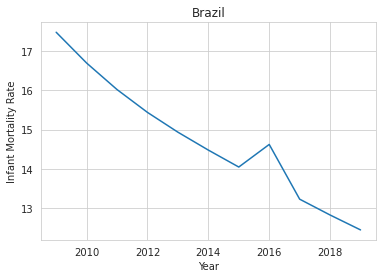

In [45]:
brasil_data = avg_data[avg_data['Country'] == 'Brazil']
plt.title('Brazil')
sns.lineplot(data= brasil_data, x = 'Year', y = 'Infant Mortality Rate')

What happened in 2016? Apparently there was an outbreak of the Zika virus which caused a small (4.1%) spike. It seems that Brazil recovered, and continued to be able to decrease the rate of infant mortality.
<br>
<a href="https://www.theguardian.com/global-development/2018/jul/17/zika-health-cuts-blamed-rise-baby-death-rates-brazil#:~:text=But%20government%20figures%20for%202016,since%20the%20current%20system%20of">More info about that here</a>

<h4 style = "font-size:20px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">2010 Spike in Haiti</h4>

<AxesSubplot:title={'center':'Haiti'}, xlabel='Year', ylabel='Infant Mortality Rate'>

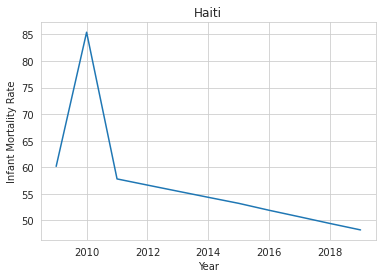

In [46]:
haiti_data = avg_data[avg_data['Country'] == 'Haiti']
plt.title('Haiti')
sns.lineplot(data= haiti_data, x = 'Year', y = 'Infant Mortality Rate')

Wow... what happened in 2010? We can see a massive spike (41.8%) It seems there was a big earthquake which devastated the country, also impacting how many of the little ones could survive.
<br>
<a href = "https://en.wikipedia.org/wiki/2010_Haiti_earthquake">More info about that here</a>

<h4 style = "font-size:20px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">Final Word: Trends by Income Level</h4>

In [47]:
income_countries = ['World Bank (low income)', 'World Bank (lower middle income)', 
                    'World Bank (upper middle income)', 'World Bank (high income)']
income_df = avg_data[avg_data['Country'].isin(income_countries)]

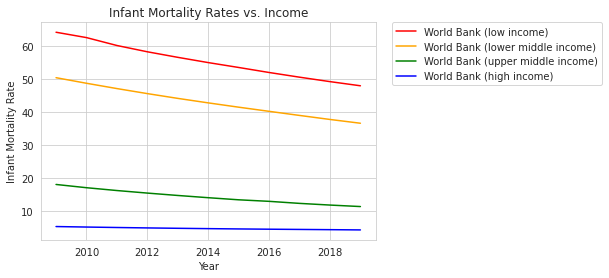

In [48]:
palettez2 ={'World Bank (low income)': "red", 'World Bank (lower middle income)': "orange",
            'World Bank (upper middle income)': "green", 'World Bank (high income)':'blue'}
plt.title('Infant Mortality Rates vs. Income')
sns.lineplot(data = income_df, x = 'Year', y = 'Infant Mortality Rate', hue = 'Country', 
             hue_order = ['World Bank (low income)', 'World Bank (lower middle income)',
                          'World Bank (upper middle income)','World Bank (high income)'],
                           palette = palettez2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

As you could probably expect, the higher the country's income, the lower their infant mortality rate. We can see that the infant mortality rates for the low income countries are a staggering 1120.7% higher than for our high income countries.  I think it is safe to say that income and infant mortality rates are highly correlated.

In [49]:
print('ratio of high vs. low income countries:', 
      (income_df[income_df['Year'] == 2019].iloc[1,1]/income_df[income_df['Year'] == 2019].iloc[0,1])*100,'%')

ratio of high vs. low income countries: 1120.7474449570693 %


<h4 style = "font-size:50px; font-family: Garamond; font-weight: bold; background-color: #add2e4; color:k; text-align: center; border-width:3px ; border-style: solid; border-radius: 10px 10px; padding:5px">Final Conclusions</h4>

In [50]:
comparison_df.describe()

,2009_IMR,2019_IMR,Percent_Change
count,231.000000,231.000000,231.000000
mean,28.369246,21.160393,-24.902424
std,24.365958,18.672680,15.712061
min,2.144415,1.493181,-68.460000
25%,8.564789,5.846095,-33.640000
50%,20.048250,14.486694,-25.490000
75%,44.800758,32.241502,-19.805000
max,110.807610,81.003217,53.360000


We looked at the world and visualized the trends and the numbers.

We can see that overall, from 2009-2019, there is a strong overall trend downward when it comes to infant mortality. The world has seen a 25.49% median decrease in these years. Some countries are making tremendous progress, but some need some attention.

[1] In terms of sheer numbers, our infants in Africa need a lot of help.
<br>
[2] In terms of climbing rates, the little ones of Botswana, Dominica, and Venezuela need some help.
<br>
[3] Overall, our poorer countries need some help

In future notebooks, I would like to explore some cost-effective strategies to implement.

As a species, if we possess the technologies and the knowledge to have such low infant mortality in the higher income countries, I would love to see us SHARE these technologies and knowledge to the people who look after our little ones when they are too young to look after themselves.

I am a new data scientist, so if you learned something, please connect with me. I hope we can work together on some future projects if you are interested. And again, I am still learning, so if you have any feedback or ways to improve, please let me know.

I would also like to thank the people on Kaggle. I have read a lot of your notebooks, and learned a lot. I applied some of what I learned to this notebook.